# Большая домашняя работа

Эта домашнаяя работа будет уже более творческой.

Будем решать еще одно соревнование на Kaggle, с похожей задачей про предсказание кликов по рекламе: https://www.kaggle.com/c/outbrain-click-prediction

Оно уже завершилось, но мы будем делать приватные посылки для скоринга на тестовой выборке. 

Вам необходимо решить указанную задачу. Есть небольшие ограничения:
* Сбор датасета для обучения необходимо производить средствами Spark
* Нельзя обучать модели из sklearn (другие функции оттуда брать можно, например для оценки качества)

В остальном вы более-менее свободны в выборе инструментов и подходов к решению.

В качестве сдачи вам необходимо прислать ноутбук, в котором будет:
* Код на Spark в котором вы собираете датасет
* Код обучения вашей модели
* Скриншот из Kaggle, где видна ваша посылка и метрика на ней


**Важно** В задании есть лик в данных (https://www.kaggle.com/its7171/outbrain-click-prediction/leakage-solution дает +0.015), его использовать нельзя!

## Критерии оценивания

Будем смотреть на MAP посылки, полученный на тестовой выборке соревнования:
* `< 0.64` (это AUC ~0.73) - до 4 баллов
* `>= 0.64` - 5
* `>= 0.65` - 6
* `>= 0.66` - 7
* `>= 0.67` (AUC примерно 0.75) - 8
* `>= 0.671` - 9
* `>= 0.672` - 10

Помимо метрики будем еще смотреть на само решение. 
* Если решение написано слишком неоптимально, то можно потерять балл (но не больше одного). 
* Если у нас будут большие сомнения по поводу того, можно ли было получить такое качество на той модели, которую вы выбрали и обучили, то можно потерять балл (тут уже много можно потерять, вплоть до обнуления работы, если найдем прям списывание).

В связи с этим есть еще один нюанс - ваше финальное решение должно получаться запуском всего вашего ноутбука при помощи “Run All Cells” на свежем кластере.


### Заметки на полях

**1.** Сохраняйте промежуточные результаты в HDFS. За один присест вы домашку не решите, поэтому почаще сохраняйте свои результаты, чтобы вам не было мучительно больно за бесцельно прожитые часы ожидания работы кластера.

**2.** Конвертируйте данные в Parquet и используйте по максимуму Dataframe API. Вам придется исследовать данные и проверять гипотезы, поэтому используйте быстрые инструменты для этого.

**3.** Перед тем как запускать большой запрос, проверьте вашу идею на небольшом семпле, если это возможно. Это спасет сам кучу часов.

**4.** Тьюнингом параметров VW можно выжать AUC 0.732 из очень простых признаков. Для более крутых фичей советую почитать отчет одного участника конкурса: http://dsnotes.com/post/2017-01-27-lessons-learned-from-outbrain-click-prediction-kaggle-competition/ ( pdf странички https://www.dropbox.com/s/hd86p0kvf3ad5sy/Large%20data%2C%20feature%20hashing%20and%20online%20learning%20%C2%B7%20Data%20Science%20notes.pdf?dl=0 ). На тупых фичах у них AUC 0.737, MAP 0.654 (они добавили еще interactions длины 2), на умных AUC 0.752, MAP 0.673, ориентируйтесь на них, они попали в топ 50. У них кстати довольно простые фичи по page_views, у них там весь код про то, как это на одной машине посчитать, у вас таких проблем нет.

**5.** За один день домашка не делается, на хорошую оценку и за 2 не делается. Планируйте время на домашку, мы специально ее даем на 4 недели.


In [14]:
%cd /Users/arinaruck/Desktop/cs/lsml/lsml-2021-public/

!pwd

/Users/arinaruck/Desktop/cs/lsml/lsml-2021-public
/Users/arinaruck/Desktop/cs/lsml/lsml-2021-public


In [15]:
%%bash

az login -u arina.ruck@gmail.com -p $(cat password-file.txt)
rm -r big_hw
mkdir -p big_hw

cd big_hw/

[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "fa34e92c-e581-439a-b6ae-b41b61270513",
    "id": "dfeaef04-2e5c-4480-8ebf-301863ed526a",
    "isDefault": true,
    "managedByTenants": [],
    "name": "Microsoft Azure Sponsorship 2",
    "state": "Disabled",
    "tenantId": "fa34e92c-e581-439a-b6ae-b41b61270513",
    "user": {
      "name": "arina.ruck@gmail.com",
      "type": "user"
    }
  },
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "fa34e92c-e581-439a-b6ae-b41b61270513",
    "id": "3750c13c-7871-4812-9fd5-94fb4ce86681",
    "isDefault": false,
    "managedByTenants": [],
    "name": "Lab1 21 Rak Arina Sergeevna",
    "state": "Enabled",
    "tenantId": "fa34e92c-e581-439a-b6ae-b41b61270513",
    "user": {
      "name": "arina.ruck@gmail.com",
      "type": "user"
    }
  }
]


In [16]:
!ls

1. Azure + IaaC.ipynb
10. Streaming algorithms.ipynb
11. KNN search.ipynb
2. Mastering bash.ipynb
3. Hadoop. MapReduce.ipynb
4. Spark.ipynb
5. Advansed Spark.ipynb
6. Classical models. Wide data.ipynb
7.1. Distributed training.ipynb
7.2. Distributed training.ipynb
8. Optimize NN.ipynb
9. AzureML & NN.ipynb
InstallAzureCLIDeb
MHW 1. Azure & Bash.ipynb
MHW 2. Hadoop. Additional notes.ipynb
MHW 2. Hadoop.ipynb
MHW 3. Classical models. Additional notes.ipynb
MHW 3. Classical models.ipynb
MHW 4. DIstributed NN & AzureML.ipynb
MHW2_Hadoop.ipynb
MHW3._Classical_models.ipynb
Main Homework. Outbrain.ipynb
README.md
Rak_Arina_171_MHW1.ipynb
big_hw
common.tf
data
deps.yaml
dist-deps.yaml
dist-torch
docker-compose.yaml
hadoop
imgs
mhw3
my-first-cloud
password-file.txt
single-machine-spark
single-machine-spark.tf
spark.tf
terra.zip
terraform
terraform.tfstate
terraform.tfstate.backup
torch-mnist


In [23]:
%cd big_hw

[Errno 2] No such file or directory: 'big_hw'
/Users/arinaruck/Desktop/cs/lsml/lsml-2021-public/big_hw


In [20]:
!mkdir single-machine-spark
!mv ./* ./single-machine-spark/

mkdir: single-machine-spark: File exists
mv: rename ./single-machine-spark to ./single-machine-spark/single-machine-spark: Invalid argument


In [28]:
!ls single-machine-spark
!mv single-machine-spark/pyspark-example.ipynb.txt single-machine-spark/pyspark-example.ipynb

bootstrap.sh              pyspark-example.ipynb.txt single-machine-spark.tf


In [31]:
%cd single-machine-spark

/Users/arinaruck/Desktop/cs/lsml/lsml-2021-public/big_hw/single-machine-spark


In [32]:
%%writefile bootstrap.sh

#!/usr/bin/env bash

set -e

echo "Updating..."
sudo apt-get update -y
sudo apt-get install python3-pip openjdk-8-jdk-headless -y

echo "Install python deps..."
sudo pip3 install jupyter findspark psutil


echo "Install spark"
sudo wget https://apache-mirror.rbc.ru/pub/apache/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
sudo mkdir -p /spark
sudo tar xf spark-3.1.1-bin-hadoop2.7.tgz -C /spark

echo "Run jupyter..."
sudo mkdir -p /jupyter
sudo chmod 0777 -R /jupyter
cd /jupyter
sudo tmux new -s spark -d "jupyter notebook --no-browser --ip=0.0.0.0 --allow-root --NotebookApp.token=" 2> /dev/null

echo "DONE!"

Overwriting bootstrap.sh


In [33]:
%%writefile single-machine-spark.tf
provider "azurerm" {
  subscription_id = "3750c13c-7871-4812-9fd5-94fb4ce86681"
  features {}
}

# Группа ресурсов. К ней будут линковаться все осталные ресурсы
resource "azurerm_resource_group" "lsml_rg" {
  name = "lsml-resource-group"
  location = "westus"
}

# Виртуальная сеть внутри облака
resource "azurerm_virtual_network" "lsml_vn" {
  resource_group_name = azurerm_resource_group.lsml_rg.name
  location = azurerm_resource_group.lsml_rg.location

  name = "lsml-vitrual-network"

  address_space = ["10.0.0.0/16"]
  # Пул адресов внутри сети
}

# Виртуальная подсеть внутри облака
resource "azurerm_subnet" "lsml_subnet" {
  resource_group_name = azurerm_resource_group.lsml_rg.name
  virtual_network_name = azurerm_virtual_network.lsml_vn.name

  name = "internal"

  address_prefixes = ["10.0.2.0/24"]
}

resource "azurerm_public_ip" "lsml_pub_ip_big" {
  location = azurerm_resource_group.lsml_rg.location
  resource_group_name = azurerm_resource_group.lsml_rg.name

  name = "lsml-public-ip-spark-biggg"

  allocation_method = "Dynamic" # Выдаем динамический ip
  idle_timeout_in_minutes = 30
  domain_name_label = "bigggsparkmachine" # Для удобства можно использовать DNS имя
}

# Сетевой интерфейс для нашей машины
resource "azurerm_network_interface" "lsml_ni" {
  location = azurerm_resource_group.lsml_rg.location
  resource_group_name = azurerm_resource_group.lsml_rg.name

  name = "lsml-nic-spark-biggg"

  ip_configuration {
    name = "internal"
    private_ip_address_allocation = "Dynamic"
    subnet_id = azurerm_subnet.lsml_subnet.id
    public_ip_address_id = azurerm_public_ip.lsml_pub_ip_big.id
  }
}

# Сама виртуальная машина
resource "azurerm_virtual_machine" "lsml_vm" {
  resource_group_name = azurerm_resource_group.lsml_rg.name
  location = azurerm_resource_group.lsml_rg.location

  name = "lsml-machine-spark-biggg"

  vm_size = "Standard_E32d_v4" # 32 CPU 256 GB  https://azure.microsoft.com/en-us/pricing/details/virtual-machines/linux/#edv4-series

  network_interface_ids = [
    azurerm_network_interface.lsml_ni.id,
    # Подключаем к сети
  ]

  storage_image_reference {
    # Используем образ Ubuntu 16.04
    publisher = "Canonical"
    offer = "UbuntuServer"
    sku = "18.04-LTS"
    version = "latest"
  }

  os_profile {
    computer_name = "hostname"
    admin_username = "azureuser" # Пользователь и его пароль
    admin_password = "Password1234!"
  }
  os_profile_linux_config {
    disable_password_authentication = false
    // ssh_keys {
    //   path = "/home/azureuser/.ssh/authorized_keys"
    //   key_data = file("~/id_rsa.pub") # Можем указать наш ключ, как ключ для авторизации на машине
    // }
  }

  delete_os_disk_on_termination = true
  storage_os_disk {
    name = "main-disk"
    caching = "ReadWrite"
    create_option = "FromImage"
    managed_disk_type = "Standard_LRS"
    disk_size_gb = "300" # Указываем какой использовать основной жесткий диск и его размер
  }

  connection {
    # Указываем, как подключиться к машине. Будем использовать ssh с паролем и доменным именем
    type = "ssh"
    user = "azureuser"
    password = "Password1234!"
    host = "${azurerm_public_ip.lsml_pub_ip_big.domain_name_label}.${azurerm_resource_group.lsml_rg.location}.cloudapp.azure.com"
  }

  provisioner "remote-exec" { # Запускаем удаленно
    script = "bootstrap.sh" # Указываем, какой скрипт запустить
  }

  provisioner "file" {
    source = "pyspark-example.ipynb"
    destination = "/jupyter/pyspark-example.ipynb"
  }
}


# Сохраним несколько важных значений в output. Их можно будет потом использовать для наших целей

data "azurerm_public_ip" "lsml_public_ip" {
  name = azurerm_public_ip.lsml_pub_ip_big.name
  resource_group_name = azurerm_virtual_machine.lsml_vm.resource_group_name
}

output "public_domain" {
  # Домен нашего сервера
  value = "${azurerm_public_ip.lsml_pub_ip_big.domain_name_label}.${azurerm_resource_group.lsml_rg.location}.cloudapp.azure.com"
}

output "public_ip" {
  # Публичный ip нашего сервера
  value = data.azurerm_public_ip.lsml_public_ip.ip_address
}

output "private_ip" {
  # Приватный ip нашего сервера
  value = azurerm_network_interface.lsml_ni.private_ip_address
}

output "jupyter_endpoint" {
  value = "http://${azurerm_network_interface.lsml_ni.private_ip_address}:8888/tree"
}

Overwriting single-machine-spark.tf


In [9]:
!cat  single-machine-spark.tf

provider "azurerm" {
  subscription_id = "3750c13c-7871-4812-9fd5-94fb4ce86681"
  features {}
}

# Группа ресурсов. К ней будут линковаться все осталные ресурсы
resource "azurerm_resource_group" "lsml_rg" {
  name = "lsml-resource-group"
  location = "westus"
}

# Виртуальная сеть внутри облака
resource "azurerm_virtual_network" "lsml_vn" {
  resource_group_name = azurerm_resource_group.lsml_rg.name
  location = azurerm_resource_group.lsml_rg.location

  name = "lsml-vitrual-network"

  address_space = ["10.0.0.0/16"]
  # Пул адресов внутри сети
}

# Виртуальная подсеть внутри облака
resource "azurerm_subnet" "lsml_subnet" {
  resource_group_name = azurerm_resource_group.lsml_rg.name
  virtual_network_name = azurerm_virtual_network.lsml_vn.name

  name = "internal"

  address_prefixes = ["10.0.2.0/24"]
}

resource "azurerm_public_ip" "lsml_pub_ip_big" {
  location = azurerm_resource_group.lsml_rg.location
  resource_group_name = azurerm_resource_group.lsml_rg.name

  name = "lsml-publi

In [34]:
! terraform init


Initializing the backend...

Initializing provider plugins...
- Finding latest version of hashicorp/azurerm...
- Installing hashicorp/azurerm v2.53.0...
- Installed hashicorp/azurerm v2.53.0 (signed by HashiCorp)

Terraform has created a lock file .terraform.lock.hcl to record the provider
selections it made above. Include this file in your version control repository
so that Terraform can guarantee to make the same selections by default when
you run "terraform init" in the future.

Terraform has been successfully initialized!

You may now begin working with Terraform. Try running "terraform plan" to see
any changes that are required for your infrastructure. All Terraform commands
should now work.

If you ever set or change modules or backend configuration for Terraform,
rerun this command to reinitialize your working directory. If you forget, other
commands will detect it and remind you to do so if necessary.


In [35]:
!terraform import azurerm_resource_group.lsml_rg /subscriptions/3750c13c-7871-4812-9fd5-94fb4ce86681/resourceGroups/lsml-resource-group
!terraform import azurerm_virtual_network.lsml_vn /subscriptions/3750c13c-7871-4812-9fd5-94fb4ce86681/resourceGroups/lsml-resource-group/providers/Microsoft.Network/virtualNetworks/lsml-vitrual-network

azurerm_resource_group.lsml_rg: Importing from ID "/subscriptions/3750c13c-7871-4812-9fd5-94fb4ce86681/resourceGroups/lsml-resource-group"...
azurerm_resource_group.lsml_rg: Import prepared!
  Prepared azurerm_resource_group for import
azurerm_resource_group.lsml_rg: Refreshing state... [id=/subscriptions/3750c13c-7871-4812-9fd5-94fb4ce86681/resourceGroups/lsml-resource-group]

Error: Cannot import non-existent remote object

While attempting to import an existing object to
azurerm_resource_group.lsml_rg, the provider detected that no object exists
with the given id. Only pre-existing objects can be imported; check that the
id is correct and that it is associated with the provider's configured region
or endpoint, or use "terraform apply" to create a new remote object for this
resource.

azurerm_virtual_network.lsml_vn: Importing from ID "/subscriptions/3750c13c-7871-4812-9fd5-94fb4ce86681/resourceGroups/lsml-resource-group/providers/Microsoft.Network/virtualNetworks/lsml-vitrual-networ

In [36]:
! echo "yes" | terraform apply


An execution plan has been generated and is shown below.
Resource actions are indicated with the following symbols:
  + create
 <= read (data resources)

Terraform will perform the following actions:

  # data.azurerm_public_ip.lsml_public_ip will be read during apply
  # (config refers to values not yet known)
 <= data "azurerm_public_ip" "lsml_public_ip"  {
      + allocation_method       = (known after apply)
      + domain_name_label       = (known after apply)
      + fqdn                    = (known after apply)
      + id                      = (known after apply)
      + idle_timeout_in_minutes = (known after apply)
      + ip_address              = (known after apply)
      + ip_version              = (known after apply)
      + location                = (known after apply)
      + name                    = "lsml-public-ip-spark-biggg"
      + resource_group_name     = "lsml-resource-group"
      + reverse_fqdn            = (known after apply)
      + sku                     

Do you want to perform these actions?
  Terraform will perform the actions described above.
  Only 'yes' will be accepted to approve.

  Enter a value: 
azurerm_resource_group.lsml_rg: Creating...
azurerm_resource_group.lsml_rg: Creation complete after 3s [id=/subscriptions/3750c13c-7871-4812-9fd5-94fb4ce86681/resourceGroups/lsml-resource-group]
azurerm_public_ip.lsml_pub_ip_big: Creating...
azurerm_virtual_network.lsml_vn: Creating...
azurerm_public_ip.lsml_pub_ip_big: Still creating... [10s elapsed]
azurerm_virtual_network.lsml_vn: Still creating... [10s elapsed]
azurerm_public_ip.lsml_pub_ip_big: Creation complete after 10s [id=/subscriptions/3750c13c-7871-4812-9fd5-94fb4ce86681/resourceGroups/lsml-resource-group/providers/Microsoft.Network/publicIPAddresses/lsml-public-ip-spark-biggg]
azurerm_virtual_network.lsml_vn: Creation complete after 10s [id=/subscriptions/3750c13c-7871-4812-9fd5-94fb4ce86681/resourceGroups/lsml-resource-group/providers/Microsoft.Network/virtualNetworks/lsml

azurerm_virtual_machine.lsml_vm (remote-exec): 0% [4 Packages store 0 B] [9 Packages 2
azurerm_virtual_machine.lsml_vm (remote-exec): 0% [4 Packages store 0 B] [Waiting for
azurerm_virtual_machine.lsml_vm (remote-exec): Get:10 http://azure.archive.ubuntu.com/ubuntu bionic-updates/main Translation-en [402 kB]
azurerm_virtual_machine.lsml_vm (remote-exec): 0% [4 Packages store 0 B] [10 Translati
azurerm_virtual_machine.lsml_vm (remote-exec): 0% [4 Packages store 0 B] [Waiting for
azurerm_virtual_machine.lsml_vm (remote-exec): Get:11 http://azure.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1724 kB]
azurerm_virtual_machine.lsml_vm (remote-exec): 0% [4 Packages store 0 B] [11 Packages
azurerm_virtual_machine.lsml_vm (remote-exec): 0% [4 Packages store 0 B] [Waiting for
azurerm_virtual_machine.lsml_vm (remote-exec): Get:12 http://azure.archive.ubuntu.com/ubuntu bionic-updates/universe Translation-en [365 kB]
azurerm_virtual_machine.lsml_vm (remote-exec): 0% [4 Packages 

azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 39%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 39%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 57%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 57%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 57%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 57%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 58%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 58%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 65%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 65%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 70%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 70%
azurerm_virtual_machine.lsml_vm (remote-exec): Reading package lists... 71%
azurerm_virt

azurerm_virtual_machine.lsml_vm (remote-exec): The following NEW packages will be installed:
azurerm_virtual_machine.lsml_vm (remote-exec):   binutils binutils-common
azurerm_virtual_machine.lsml_vm (remote-exec):   binutils-x86-64-linux-gnu
azurerm_virtual_machine.lsml_vm (remote-exec):   build-essential ca-certificates-java
azurerm_virtual_machine.lsml_vm (remote-exec):   cpp cpp-7 dh-python dpkg-dev
azurerm_virtual_machine.lsml_vm (remote-exec):   fakeroot fontconfig-config
azurerm_virtual_machine.lsml_vm (remote-exec):   fonts-dejavu-core g++ g++-7 gcc
azurerm_virtual_machine.lsml_vm (remote-exec):   gcc-7 gcc-7-base java-common
azurerm_virtual_machine.lsml_vm (remote-exec):   libalgorithm-diff-perl
azurerm_virtual_machine.lsml_vm (remote-exec):   libalgorithm-diff-xs-perl
azurerm_virtual_machine.lsml_vm (remote-exec):   libalgorithm-merge-perl libasan4
azurerm_virtual_machine.lsml_vm (remote-exec):   libatomic1 libbinutils libc-dev-bin
azurerm_virtual_machine.lsml_vm (remote-exec)

azurerm_virtual_machine.lsml_vm (remote-exec): 19% [26 gcc-7 50.0 kB/9381 kB 1%]
azurerm_virtual_machine.lsml_vm (remote-exec): 24% [Waiting for headers]
azurerm_virtual_machine.lsml_vm (remote-exec): Get:27 http://azure.archive.ubuntu.com/ubuntu bionic-updates/main amd64 gcc amd64 4:7.4.0-1ubuntu2.3 [5184 B]
azurerm_virtual_machine.lsml_vm (remote-exec): Get:28 http://azure.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libstdc++-7-dev amd64 7.5.0-3ubuntu1~18.04 [1471 kB]
azurerm_virtual_machine.lsml_vm (remote-exec): 25% [28 libstdc++-7-dev 34.5 kB/1471 kB
azurerm_virtual_machine.lsml_vm (remote-exec): 26% [Waiting for headers]
azurerm_virtual_machine.lsml_vm (remote-exec): Get:29 http://azure.archive.ubuntu.com/ubuntu bionic-updates/main amd64 g++-7 amd64 7.5.0-3ubuntu1~18.04 [9697 kB]
azurerm_virtual_machine.lsml_vm (remote-exec): 26% [29 g++-7 65.5 kB/9697 kB 1%]
azurerm_virtual_machine.lsml_vm (remote-exec): 32% [Waiting for headers]
azurerm_virtual_machine.lsml_vm (remote-e

azurerm_virtual_machine.lsml_vm (remote-exec): 60% [60 libpython3.6-dev 42.5 kB/44.9 M
azurerm_virtual_machine.lsml_vm (remote-exec): 78% [60 libpython3.6-dev 29.7 MB/44.9 M
azurerm_virtual_machine.lsml_vm (remote-exec): 88% [Waiting for headers]
azurerm_virtual_machine.lsml_vm (remote-exec): Get:61 http://azure.archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpython3-dev amd64 3.6.7-1~18.04 [7328 B]
azurerm_virtual_machine.lsml_vm (remote-exec): Get:62 http://azure.archive.ubuntu.com/ubuntu bionic/main amd64 manpages-dev all 4.15-1 [2217 kB]
azurerm_virtual_machine.lsml_vm (remote-exec): 88% [62 manpages-dev 57.5 kB/2217 kB 3%
azurerm_virtual_machine.lsml_vm (remote-exec): 90% [Waiting for headers]
azurerm_virtual_machine.lsml_vm (remote-exec): Get:63 http://azure.archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u282-b08-0ubuntu1~18.04 [8267 kB]
azurerm_virtual_machine.lsml_vm (remote-exec): 90% [63 openjdk-8-jdk-headless 65.5 kB/
azurerm_vir

azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package libc-dev-bin.
azurerm_virtual_machine.lsml_vm (remote-exec): Preparing to unpack .../05-libc-dev-bin_2.27-3ubuntu1.4_amd64.deb ...
azurerm_virtual_machine.lsml_vm (remote-exec): Unpacking libc-dev-bin (2.27-3ubuntu1.4) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package linux-libc-dev:amd64.
azurerm_virtual_machine.lsml_vm (remote-exec): Preparing to unpack .../06-linux-libc-dev_4.15.0-140.144_amd64.deb ...
azurerm_virtual_machine.lsml_vm (remote-exec): Unpacking linux-libc-dev:amd64 (4.15.0-140.144) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package libc6-dev:amd64.
azurerm_virtual_machine.lsml_vm (remote-exec): Preparing to unpack .../07-libc6-dev_2.27-3ubuntu1.4_amd64.deb ...
azurerm_virtual_machine.lsml_vm: Still creating... 40s elapsed]
azurerm_virtual_machine.lsml_vm (remote-exec): Unpacking libc6-dev:amd64 (2.27-3ub

azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package g++.
azurerm_virtual_machine.lsml_vm (remote-exec): Preparing to unpack .../29-g++_4%3a7.4.0-1ubuntu2.3_amd64.deb ...
azurerm_virtual_machine.lsml_vm (remote-exec): Unpacking g++ (4:7.4.0-1ubuntu2.3) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package make.
azurerm_virtual_machine.lsml_vm (remote-exec): Preparing to unpack .../30-make_4.1-9.1ubuntu1_amd64.deb ...
azurerm_virtual_machine.lsml_vm (remote-exec): Unpacking make (4.1-9.1ubuntu1) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package libdpkg-perl.
azurerm_virtual_machine.lsml_vm (remote-exec): Preparing to unpack .../31-libdpkg-perl_1.19.0.5ubuntu2.3_all.deb ...
azurerm_virtual_machine.lsml_vm (remote-exec): Unpacking libdpkg-perl (1.19.0.5ubuntu2.3) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package dpkg-dev.
azurerm_virtual_

azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package fakeroot.
azurerm_virtual_machine.lsml_vm (remote-exec): Preparing to unpack .../53-fakeroot_1.22-2ubuntu1_amd64.deb ...
azurerm_virtual_machine.lsml_vm (remote-exec): Unpacking fakeroot (1.22-2ubuntu1) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package libalgorithm-diff-perl.
azurerm_virtual_machine.lsml_vm (remote-exec): Preparing to unpack .../54-libalgorithm-diff-perl_1.19.03-1_all.deb ...
azurerm_virtual_machine.lsml_vm (remote-exec): Unpacking libalgorithm-diff-perl (1.19.03-1) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Selecting previously unselected package libalgorithm-diff-xs-perl.
azurerm_virtual_machine.lsml_vm (remote-exec): Preparing to unpack .../55-libalgorithm-diff-xs-perl_0.04-5_amd64.deb ...
azurerm_virtual_machine.lsml_vm (remote-exec): Unpacking libalgorithm-diff-xs-perl (0.04-5) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Se

azurerm_virtual_machine.lsml_vm (remote-exec): Setting up fonts-dejavu-core (2.37-1) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up python3-crypto (2.6.1-8ubuntu2) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up libtsan0:amd64 (8.4.0-1ubuntu1~18.04) ...
azurerm_virtual_machine.lsml_vm: Still creating... 10s elapsed]
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up python3-xdg (0.25-4ubuntu1.1) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up python3-keyrings.alt (3.0-1) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up linux-libc-dev:amd64 (4.15.0-140.144) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up java-common (0.68ubuntu1~18.04.1) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up libdpkg-perl (1.19.0.5ubuntu2.3) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up libjpeg-turbo8:amd64 (1.5.2-0ubuntu5.18.04.4) ...
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up python3-wheel

azurerm_virtual_machine.lsml_vm (remote-exec): update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
azurerm_virtual_machine.lsml_vm (remote-exec): update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
azurerm_virtual_machine.lsml_vm (remote-exec): update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/lib/jexec to provide /usr/bin/jexec (jexec) in auto mode
azurerm_virtual_machine.lsml_vm (remote-exec): Setting up ca-certificates-java (20180516ubuntu1~18.04.1) ...
azurerm_virtual_machine.lsml_vm (remote-exec): head: cannot open '/etc/ssl/certs/java/cacerts' for reading: No such file or directory
azurerm_virtual_machine.lsml_vm (remote-exec): Adding debian:T-TeleSec_GlobalRoot_Class_3.pem
azurerm_virtual_machine.lsml_vm (remote-exec): Adding debian:SSL.com_EV_Root_Certification_Authority_RSA_R2.pem
azurerm_virtual_m

azurerm_virtual_machine.lsml_vm (remote-exec): update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/idlj to provide /usr/bin/idlj (idlj) in auto mode
azurerm_virtual_machine.lsml_vm (remote-exec): update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/jdeps to provide /usr/bin/jdeps (jdeps) in auto mode
azurerm_virtual_machine.lsml_vm (remote-exec): update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/wsimport to provide /usr/bin/wsimport (wsimport) in auto mode
azurerm_virtual_machine.lsml_vm (remote-exec): update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/jinfo to provide /usr/bin/jinfo (jinfo) in auto mode
azurerm_virtual_machine.lsml_vm (remote-exec): update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/jsadebugd to provide /usr/bin/jsadebugd (jsadebugd) in auto mode
azurerm_virtual_machine.lsml_vm (remote-exec): update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/native2ascii to provide /usr/bin/native2ascii

azurerm_virtual_machine.lsml_vm (remote-exec):     73% |███████████████████████▋        | 348kB 61.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     76% |████████████████████████▍       | 358kB 56.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     78% |█████████████████████████       | 368kB 55.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     80% |█████████████████████████▊      | 378kB 63.1MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     82% |██████████████████████████▍     | 389kB 63.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     84% |███████████████████████████▏    | 399kB 63.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     86% |███████████████████████████▉    | 409kB 71.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     89% |████████████████████████████▌   | 419kB 70.7MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     91% |████████

azurerm_virtual_machine.lsml_vm (remote-exec):     6% |██                              | 583kB 101.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     6% |██                              | 593kB 100.3MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     6% |██                              | 604kB 101.3MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     6% |██                              | 614kB 101.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     6% |██                              | 624kB 100.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     6% |██▏                             | 634kB 102.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     6% |██▏                             | 645kB 109.1MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     6% |██▏                             | 655kB 109.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     7% |██▎      

azurerm_virtual_machine.lsml_vm (remote-exec):     25% |████████▏                       | 2.4MB 106.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     25% |████████▏                       | 2.4MB 103.9MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     25% |████████▎                       | 2.4MB 105.3MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     25% |████████▎                       | 2.4MB 105.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     25% |████████▎                       | 2.5MB 105.3MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     26% |████████▎                       | 2.5MB 105.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     26% |████████▍                       | 2.5MB 103.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     26% |████████▍                       | 2.5MB 104.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     26% |

azurerm_virtual_machine.lsml_vm (remote-exec):     48% |███████████████▋                | 4.6MB 104.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     49% |███████████████▊                | 4.6MB 105.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     49% |███████████████▊                | 4.7MB 105.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     49% |███████████████▊                | 4.7MB 104.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     49% |███████████████▉                | 4.7MB 104.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     49% |███████████████▉                | 4.7MB 103.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     49% |███████████████▉                | 4.7MB 105.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     49% |████████████████                | 4.7MB 105.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     49% |

azurerm_virtual_machine.lsml_vm (remote-exec):     59% |███████████████████             | 5.7MB 105.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     59% |███████████████████▏            | 5.7MB 105.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     59% |███████████████████▏            | 5.7MB 103.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     59% |███████████████████▏            | 5.7MB 105.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     60% |███████████████████▏            | 5.7MB 105.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     60% |███████████████████▎            | 5.7MB 104.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     60% |███████████████████▎            | 5.7MB 105.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     60% |███████████████████▎            | 5.7MB 105.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     60% |

azurerm_virtual_machine.lsml_vm (remote-exec):     73% |███████████████████████▍        | 6.9MB 105.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     73% |███████████████████████▌        | 7.0MB 106.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     73% |███████████████████████▌        | 7.0MB 105.9MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     73% |███████████████████████▌        | 7.0MB 105.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     73% |███████████████████████▋        | 7.0MB 104.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     73% |███████████████████████▋        | 7.0MB 105.3MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     73% |███████████████████████▋        | 7.0MB 105.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     74% |███████████████████████▊        | 7.0MB 102.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     74% |

azurerm_virtual_machine.lsml_vm (remote-exec):     97% |███████████████████████████████ | 9.2MB 104.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     97% |███████████████████████████████ | 9.2MB 105.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     97% |███████████████████████████████▏| 9.2MB 105.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     97% |███████████████████████████████▏| 9.2MB 103.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     97% |███████████████████████████████▏| 9.2MB 105.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     97% |███████████████████████████████▏| 9.2MB 107.7MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     97% |███████████████████████████████▎| 9.3MB 108.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     97% |███████████████████████████████▎| 9.3MB 108.7MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     97% |

azurerm_virtual_machine.lsml_vm (remote-exec): Collecting ipykernel (from jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/56/95/3a670c8b2c2370bd8631c313f42e60983b3113ffec4035940592252bd6d5/ipykernel-5.5.0-py3-none-any.whl (120kB)
azurerm_virtual_machine.lsml_vm (remote-exec): 
azurerm_virtual_machine.lsml_vm (remote-exec):     8% |██▊                             | 10kB 53.7MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     16% |█████▍                          | 20kB 59.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     25% |████████▏                       | 30kB 68.9MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     33% |██████████▉                     | 40kB 74.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     42% |█████████████▋                  | 51kB 78.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     50% |████████████████▎        

azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/77/e8/c3cf72a32a697256608d5fa96360c431adec6e1c6709ba7f13f99ff5ee04/jupyter_client-6.1.12-py3-none-any.whl (112kB)
azurerm_virtual_machine.lsml_vm (remote-exec): 
azurerm_virtual_machine.lsml_vm (remote-exec):     9% |███                             | 10kB 46.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     18% |█████▉                          | 20kB 52.3MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     27% |████████▊                       | 30kB 63.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     36% |███████████▋                    | 40kB 68.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     45% |██████████████▌                 | 51kB 71.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     54% |█████████████████▍              | 61kB 75.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-ex

azurerm_virtual_machine.lsml_vm (remote-exec):     60% |███████████████████▍            | 655kB 112.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     61% |███████████████████▋            | 665kB 113.9MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     62% |████████████████████            | 675kB 114.9MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     63% |████████████████████▎           | 686kB 113.9MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     64% |████████████████████▌           | 696kB 112.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     65% |████████████████████▉           | 706kB 110.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     66% |█████████████████████▏          | 716kB 110.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     67% |█████████████████████▌          | 727kB 109.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     67% |

azurerm_virtual_machine.lsml_vm (remote-exec): Collecting ipython (from jupyter-console->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/23/6a/210816c943c9aeeb29e4e18a298f14bf0e118fe222a23e13bfcc2d41b0a4/ipython-7.16.1-py3-none-any.whl (785kB)
azurerm_virtual_machine.lsml_vm (remote-exec): 
azurerm_virtual_machine.lsml_vm (remote-exec):     1% |▍                               | 10kB 44.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     2% |▉                               | 20kB 49.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     3% |█▎                              | 30kB 58.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     5% |█▊                              | 40kB 64.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     6% |██                              | 51kB 68.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     7% |██▌             

azurerm_virtual_machine.lsml_vm (remote-exec): Collecting prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0 (from jupyter-console->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/eb/e6/4b4ca4fa94462d4560ba2f4e62e62108ab07be2e16a92e594e43b12d3300/prompt_toolkit-3.0.18-py3-none-any.whl (367kB)
azurerm_virtual_machine.lsml_vm (remote-exec): 
azurerm_virtual_machine.lsml_vm (remote-exec):     2% |█                               | 10kB 47.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     5% |█▉                              | 20kB 51.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     8% |██▊                             | 30kB 60.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     11% |███▋                            | 40kB 66.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     13% |████▌                           | 51kB 69.7MB/s eta 0:00:01
azurerm_virtual_machine.l

azurerm_virtual_machine.lsml_vm (remote-exec): Collecting qtpy (from qtconsole->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/cd/fd/9972948f02e967b691cc0ca1f26124826a3b88cb38f412a8b7935b8c3c72/QtPy-1.9.0-py2.py3-none-any.whl (54kB)
azurerm_virtual_machine.lsml_vm (remote-exec): 
azurerm_virtual_machine.lsml_vm (remote-exec):     18% |██████                          | 10kB 32.3MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     37% |████████████                    | 20kB 37.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     56% |██████████████████▏             | 30kB 45.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     75% |████████████████████████▏       | 40kB 50.7MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     94% |██████████████████████████████▎ | 51kB 54.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     100% |███████████████████

azurerm_virtual_machine.lsml_vm (remote-exec): Collecting entrypoints>=0.2.2 (from nbconvert->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/ac/c6/44694103f8c221443ee6b0041f69e2740d89a25641e62fb4f2ee568f2f9c/entrypoints-0.3-py2.py3-none-any.whl
azurerm_virtual_machine.lsml_vm (remote-exec): Collecting jupyterlab-pygments (from nbconvert->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/a8/6f/c34288766797193b512c6508f5994b830fb06134fdc4ca8214daba0aa443/jupyterlab_pygments-0.1.2-py2.py3-none-any.whl
azurerm_virtual_machine.lsml_vm (remote-exec): Collecting widgetsnbextension~=3.5.0 (from ipywidgets->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/6c/7b/7ac231c20d2d33c445eaacf8a433f4e22c60677eb9776c7c5262d7ddee2d/widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2MB)
azurerm_virtual_machine.lsml_vm (remote-

azurerm_virtual_machine.lsml_vm (remote-exec):     68% |█████████████████████▉          | 1.5MB 113.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     68% |██████████████████████          | 1.5MB 112.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     69% |██████████████████████▏         | 1.5MB 114.6MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     69% |██████████████████████▎         | 1.5MB 115.0MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     70% |██████████████████████▌         | 1.6MB 113.2MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     70% |██████████████████████▋         | 1.6MB 114.4MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     71% |██████████████████████▊         | 1.6MB 114.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     71% |██████████████████████▉         | 1.6MB 114.5MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     71% |

azurerm_virtual_machine.lsml_vm (remote-exec): Collecting ptyprocess; os_name != "nt" (from terminado>=0.8.3->notebook->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/22/a6/858897256d0deac81a172289110f31629fc4cee19b6f01283303e18c8db3/ptyprocess-0.7.0-py2.py3-none-any.whl
azurerm_virtual_machine.lsml_vm (remote-exec): Collecting python-dateutil>=2.1 (from jupyter-client>=5.3.4->notebook->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl (227kB)
azurerm_virtual_machine.lsml_vm (remote-exec): 
azurerm_virtual_machine.lsml_vm (remote-exec):     4% |█▍                              | 10kB 53.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     9% |██▉                             | 20kB 58.9MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-e

azurerm_virtual_machine.lsml_vm (remote-exec): Collecting backcall (from ipython->jupyter-console->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/4c/1c/ff6546b6c12603d8dd1070aa3c3d273ad4c07f5771689a7b69a550e8c951/backcall-0.2.0-py2.py3-none-any.whl
azurerm_virtual_machine.lsml_vm (remote-exec): Collecting pexpect; sys_platform != "win32" (from ipython->jupyter-console->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/39/7b/88dbb785881c28a102619d46423cb853b46dbccc70d3ac362d99773a78ce/pexpect-4.8.0-py2.py3-none-any.whl (59kB)
azurerm_virtual_machine.lsml_vm (remote-exec): 
azurerm_virtual_machine.lsml_vm (remote-exec):     17% |█████▌                          | 10kB 58.8MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     34% |███████████                     | 20kB 61.9MB/s eta 0:00:01
azurerm_virtual_machine.lsml_vm (remote-exec):     52% |██████████

azurerm_virtual_machine.lsml_vm (remote-exec): Requirement already satisfied: setuptools>=18.5 in /usr/lib/python3/dist-packages (from ipython->jupyter-console->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec): Collecting pickleshare (from ipython->jupyter-console->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/9a/41/220f49aaea88bc6fa6cba8d05ecf24676326156c23b991e80b3f2fc24c77/pickleshare-0.7.5-py2.py3-none-any.whl
azurerm_virtual_machine.lsml_vm (remote-exec): Collecting wcwidth (from prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0->jupyter-console->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec):   Downloading https://files.pythonhosted.org/packages/59/7c/e39aca596badaf1b78e8f547c807b04dae603a433d3e7a7e04d67f2ef3e5/wcwidth-0.2.5-py2.py3-none-any.whl
azurerm_virtual_machine.lsml_vm (remote-exec): Collecting nest-asyncio (from nbclient<0.6.0,>=0.5.0->nbconvert->jupyter)
azurerm_virtual_machine.lsml_vm (remote-exec

azurerm_virtual_machine.lsml_vm (remote-exec):\
azurerm_virtual_machine.lsml_vm (remote-exec):|
azurerm_virtual_machine.lsml_vm (remote-exec):/
azurerm_virtual_machine.lsml_vm (remote-exec):-
azurerm_virtual_machine.lsml_vm (remote-exec):done
azurerm_virtual_machine.lsml_vm (remote-exec): Successfully installed Send2Trash-1.5.0 argon2-cffi-20.1.0 async-generator-1.10 backcall-0.2.0 bleach-3.3.0 cffi-1.14.5 decorator-4.4.2 defusedxml-0.7.1 entrypoints-0.3 findspark-1.4.2 ipykernel-5.5.0 ipython-7.16.1 ipython-genutils-0.2.0 ipywidgets-7.6.3 jedi-0.18.0 jupyter-1.0.0 jupyter-client-6.1.12 jupyter-console-6.4.0 jupyter-core-4.7.1 jupyterlab-pygments-0.1.2 jupyterlab-widgets-1.0.0 mistune-0.8.4 nbclient-0.5.3 nbconvert-6.0.7 nbformat-5.1.2 nest-asyncio-1.5.1 notebook-6.3.0 packaging-20.9 pandocfilters-1.4.3 parso-0.8.1 pexpect-4.8.0 pickleshare-0.7.5 prometheus-client-0.9.0 prompt-toolkit-3.0.18 psutil-5.8.0 ptyprocess-0.7.0 pycparser-2.20 pygments-2.8.1 pyparsing-2.4.7 python-dateutil-2.8

azurerm_virtual_machine.lsml_vm (remote-exec): -hadoop2.7.  74% 160.27M  14.8MB/s    eta 4s
azurerm_virtual_machine.lsml_vm (remote-exec): hadoop2.7.t  76% 163.24M  14.8MB/s    eta 4s
azurerm_virtual_machine.lsml_vm (remote-exec): adoop2.7.tg  77% 166.23M  14.8MB/s    eta 4s
azurerm_virtual_machine.lsml_vm: Still creating... 0s elapsed]
azurerm_virtual_machine.lsml_vm (remote-exec): doop2.7.tgz  79% 169.19M  14.8MB/s    eta 4s
azurerm_virtual_machine.lsml_vm (remote-exec): oop2.7.tgz   80% 172.16M  14.8MB/s    eta 3s
azurerm_virtual_machine.lsml_vm (remote-exec): op2.7.tgz    81% 175.16M  14.8MB/s    eta 3s
azurerm_virtual_machine.lsml_vm (remote-exec): p2.7.tgz     83% 178.13M  14.8MB/s    eta 3s
azurerm_virtual_machine.lsml_vm (remote-exec): 2.7.tgz      84% 181.10M  14.8MB/s    eta 3s
azurerm_virtual_machine.lsml_vm (remote-exec): .7.tgz       86% 184.10M  14.8MB/s    eta 3s
azurerm_virtual_machine.lsml_vm (remote-exec): 7.tgz        87% 187.08M  14.8MB/s    eta 2s
azurerm_virtual_m

## На single spark machine

In [ ]:
import os
import findspark

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/spark/spark-3.1.1-bin-hadoop2.7"

findspark.init("/spark/spark-3.1.1-bin-hadoop2.7")

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
import psutil

available_mem_gb = int(psutil.virtual_memory().total / 1024 ** 3 - 10)
available_cpu_count = psutil.cpu_count()

conf = (
    SparkConf()
    .set("spark.ui.port", 5050)  # Админка работает на 5050 порту
    .set("spark.driver.memory", "{}g".format(available_mem_gb))
)

# По воркеру на каждое ядро
sc = SparkContext("local[*]", "single-machine-spark", conf=conf)

ss = SparkSession(sc)

### Датасет

In [ ]:
trainClicks = ss.read.csv('../home/azureuser/data/clicks_train.csv', header=True)
testClicks = ss.read.csv('../home/azureuser/data/clicks_test.csv', header=True)
PageViews = ss.read.csv('../home/azureuser/data/page_views.csv', header=True)
PromotedContent = ss.read.csv('../home/azureuser/data/promoted_content.csv', header=True)
Events = ss.read.csv('../home/azureuser/data/events.csv', header=True)

trainClicks.write.parquet("../home/azureuser/data/clicks_train.parquet")
testClicks.write.parquet("../home/azureuser/data/clicks_test.parquet")
PageViews.write.parquet("../home/azureuser/data/page_views.parquet")
PromotedContent.write.parquet("../home/azureuser/data/promoted_content.parquet")
Events.write.parquet("../home/azureuser/data/events.parquet")

trainClicks = ss.read.parquet("../home/azureuser/data/clicks_train.parquet")
testClicks = ss.read.parquet("../home/azureuser/data/clicks_test.parquet")
PageViews = ss.read.parquet("../home/azureuser/data/page_views.parquet")
PromotedContent = ss.read.parquet("../home/azureuser/data/promoted_content.parquet")
Events = ss.read.parquet("../home/azureuser/data/events.parquet")

trainClicks.registerTempTable('trainClicks')
testClicks.registerTempTable('testClicks')
PageViews.registerTempTable('PageViews')
PromotedContent.registerTempTable('PromotedContent')
Events.registerTempTable('Events')

In [ ]:
ss.sql("""
        with eventsInfo as ( 
            select tr.display_id as display_id, ad_id, clicked, platform, ev.document_id as document_id,
                   geo_location, split(geo_location, '>') as split_geo_location,
                   from_unixtime((ev.timestamp + 1465876799998) / 1000, 'yyyy-MM-dd HH:mm:ss') as date 
            from trainClicks as tr
                left join Events as ev on tr.display_id = ev.display_id
        )
        select  clicked, pc.document_id as promo_document_id, campaign_id, advertiser_id,
                ei.ad_id, ei.document_id as document_id, platform, nvl(geo_location, "") as geo_location,
           nvl(split_geo_location[0], "") as country, nvl(split_geo_location[1], "") as state,
           nvl(split_geo_location[2], "") as code,
           dayofweek(date) as weekday, dayofweek(date) in (1, 7) as is_weekend, hour(date) as hour,
           display_id 
        from eventsInfo as ei
            left join PromotedContent as pc on ei.ad_id = pc.ad_id
""").registerTempTable('train')

ss.sql(
    """
    cache lazy table train
    """
)

ss.sql(
    """
    select *
    from train
    """
).write.parquet("/data/TrainSet.parquet")

In [ ]:
ss.sql("""
        with eventsInfo as ( 
            select tr.display_id as display_id, ad_id, platform, ev.document_id as document_id,
                   geo_location, split(geo_location, '>') as split_geo_location,
                   from_unixtime((ev.timestamp + 1465876799998) / 1000, 'yyyy-MM-dd HH:mm:ss') as date 
            from testClicks as te
                left join Events as ev on te.display_id = ev.display_id
        )
        select  pc.document_id as promo_document_id, campaign_id, advertiser_id,
                ei.ad_id, ei.document_id as document_id, platform, nvl(geo_location, "") as geo_location,
           nvl(split_geo_location[0], "") as country, nvl(split_geo_location[1], "") as state,
           nvl(split_geo_location[2], "") as code,
           dayofweek(date) as weekday, dayofweek(date) in (1, 7) as is_weekend, hour(date) as hour,
           display_id 
        from eventsInfo as ei
            left join PromotedContent as pc on ei.ad_id = pc.ad_id
""").registerTempTable('test')


ss.sql(
    """
    cache lazy table test
    """
)

ss.sql(
    """
    select *
    from test
    """
).write.parquet("/data/TestSet.parquet")

## VW

In [ ]:
from functools import partial

def convert_to_vw(data, split='train'):
    target = int(data['clicked']) * 2 - 1 if split == 'train' else -1
    
    promo_id = data['promo_document_id']
    campaign_id = data['campaign_id']
    advertiser_id = data['advertiser_id']
    
    ad_id = data['ad_id']
    doc_id = data['document_id']
    platform = data['platform']
    display_id = data['display_id']
    
    geo_loc = data['geo_location'].lower()
    country = data['country'].lower()
    state = data['state'].lower()
    code = data['code']
    
    day = data['weekday']
    weekend = 1 if data['is_weekend'] == 'true' else 0
    hour = data['hour']
    
    template = "{target} {display_id},{ad_id}|u {ad_id}|m {promo_id} {advertiser_id} {campaign_id} {country} {state} {code} {doc_id} {platform} |geo {geo_loc} |d {day} {hour} isw:{weekend}"
    #template = "{target} {display_id},{ad_id}|u {ad_id} |m {promo_id} {campaign_id} {advertiser_id} {doc_id} {platform} {country} {state} {code} |geo {geo_loc} |day {day} |w isw:{weekend} |h {hour}"
    return template.format(target=target, 
                           ad_id=ad_id,
                           promo_id=promo_id, campaign_id=campaign_id, advertiser_id=advertiser_id,
                           geo_loc=geo_loc, country=country, state=state, code=code, 
                           doc_id=doc_id, platform=platform,
                           day=day, weekend=weekend, hour=hour,
                           display_id=display_id
    )

test_convert_to_vw = partial(convert_to_vw, split='test')

In [ ]:
train = ss.read.parquet('/data/TrainSet.parquet')
test = ss.read.parquet('/data/TestSet.parquet')

train.rdd.map(convert_to_vw).saveAsTextFile('/data/TrainSet.vw')
test.rdd.map(test_convert_to_vw).saveAsTextFile('/data/TestSet.vw')

!cat /data/TrainSet.vw/part-* > /data/train.vw
!cat /data/TestSet.vw/part-* > /data/test.vw

In [ ]:
%%bash 

wget --user azureuser http://finance.yendor.com/ML/VW/Binaries/vw-8.20190624 -O /usr/bin/vw
chmod +x /usr/bin/vw

In [ ]:
%%bash
vw  /data/train.vw \
    --final_regressor model.bin \
    --loss_function logistic \
    --learning_rate 5 \
    --bit_precision 25 \
    --passes 25 \
    --cache -k \
    --interactions mm \
    --interactions dd \
    --ftrl --ftrl_alpha 0.01 --ftrl_beta 0.1 \
    --holdout_off
    
vw /data/test.vw \
    --predictions test_preds.txt \
    --initial_regressor model.bin \
    --testonly \
    --link logistic \
    --loss_function logistic

## Постобработка данных и посылка

In [ ]:
!pip3 install pandas 
!pip3 install pandarallel

In [ ]:
import pandas as pd
import numpy as np
from pandarallel import pandarallel

preds = pd.read_csv('test_preds.txt', sep=' |,', header=None)
preds.columns = ['prob', 'display_id', 'ad_id']

pandarallel.initialize(use_memory_fs=False, progress_bar=True, nb_workers=20)
probs_submission = preds.groupby('display_id', sort=False).parallel_apply(
        lambda x: " ".join(np.array(x.sort_values(by='prob', ascending=False).values[:, 2], dtype=int).astype('str'))
)
probs_submission = probs_submission.to_frame().rename(columns = {0:'ad_id'})
probs_submission.to_csv('second_submission.csv')

In [ ]:
!kaggle competitions submit -f second_submission.csv -m 'labels fixed' -c outbrain-click-prediction

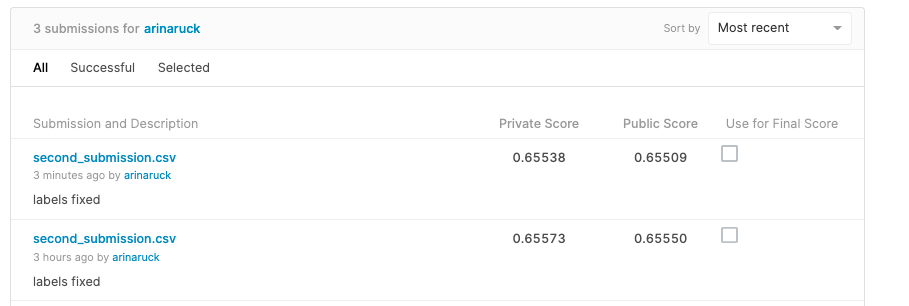